## Data: Diabetes

## Import Necessary Libraries

In [1]:
# !pip install xgboost

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

## Load and Explore the Dataset

In [4]:
# Load the dataset
df = pd.read_csv("D:/ML-Project/Datasets/diabetes.csv")

In [ ]:
# Display the first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Feature Explanations

- **Pregnancies**: 
  - This feature represents the number of times a person has been pregnant.

- **Glucose**: 
  - This feature represents the plasma glucose concentration in a 2-hour oral glucose tolerance test. It is a measure of blood sugar levels.

- **BloodPressure**: 
  - This feature represents the diastolic blood pressure (mm Hg) of the person. Diastolic blood pressure is the pressure in the arteries when the heart rests between beats.

- **SkinThickness**: 
  - This feature represents the thickness of the skinfold (mm) at the triceps. It is a measure of subcutaneous fat.

- **Insulin**: 
  - This feature represents the 2-hour serum insulin (mu U/ml) level. It measures how much insulin is circulating in the bloodstream after a glucose challenge.

- **BMI** (Body Mass Index): 
  - This feature represents the body mass index, which is calculated as weight in kilograms divided by the square of height in meters. It is a measure of body fat based on height and weight.

- **DiabetesPedigreeFunction**: 
  - This feature provides a measure of diabetes hereditary risk, calculated based on family history.

- **Age**: 
  - This feature represents the age of the person in years.

- **Outcome**: 
  - This is the target feature indicating whether a person has diabetes or not (1 for diabetes, 0 for no diabetes).

In [5]:
# Display basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Display summary statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Summary Statistics Explanation

### Explanation of Features and Summary Statistics

1- **Pregnancies**:
  - Mean: 3.845
  - Standard Deviation: 3.370
  - Minimum: 0
  - 25th Percentile (Q1): 1
  - Median (50th Percentile): 3
  - 75th Percentile (Q3): 6
  - Maximum: 17

- **Glucose**:
  - Mean: 120.895
  - Standard Deviation: 31.973
  - Minimum: 0
  - 25th Percentile (Q1): 99
  - Median (50th Percentile): 117
  - 75th Percentile (Q3): 140.25
  - Maximum: 199

- **BloodPressure**:
  - Mean: 69.105
  - Standard Deviation: 19.356
  - Minimum: 0
  - 25th Percentile (Q1): 62
  - Median (50th Percentile): 72
  - 75th Percentile (Q3): 80
  - Maximum: 122

- **SkinThickness**:
  - Mean: 20.536
  - Standard Deviation: 15.952
  - Minimum: 0
  - 25th Percentile (Q1): 0
  - Median (50th Percentile): 23
  - 75th Percentile (Q3): 32
  - Maximum: 99

- **Insulin**:
  - Mean: 79.799
  - Standard Deviation: 115.244
  - Minimum: 0
  - 25th Percentile (Q1): 0
  - Median (50th Percentile): 30.5
  - 75th Percentile (Q3): 127.25
  - Maximum: 846

- **BMI** (Body Mass Index):
  - Mean: 31.993
  - Standard Deviation: 7.884
  - Minimum: 0
  - 25th Percentile (Q1): 27.3
  - Median (50th Percentile): 32
  - 75th Percentile (Q3): 36.6
  - Maximum: 67.1

- **DiabetesPedigreeFunction**:
  - Mean: 0.472
  - Standard Deviation: 0.331
  - Minimum: 0.078
  - 25th Percentile (Q1): 0.244
  - Median (50th Percentile): 0.373
  - 75th Percentile (Q3): 0.626
  - Maximum: 2.42

- **Age**:
  - Mean: 33.241
  - Standard Deviation: 11.760
  - Minimum: 21
  - 25th Percentile (Q1): 24
  - Median (50th Percentile): 29
  - 75th Percentile (Q3): 41
  - Maximum: 81

- **Outcome**:
  - Mean: 0.349
  - Standard Deviation: 0.477
  - Minimum: 0
  - 25th Percentile (Q1): 0
  - Median (50th Percentile): 0
  - 75th Percentile (Q3): 1
  - Maximum: 1

In [7]:
# Check the distribution of class labels
class_distribution = df['Outcome'].value_counts()
print("Class distribution:")
print(class_distribution)

# Calculate and print the percentage distribution
class_percentage = df['Outcome'].value_counts(normalize=True) * 100
print("\nClass percentage distribution:")
print(class_percentage)

Class distribution:
0    500
1    268
Name: Outcome, dtype: int64

Class percentage distribution:
0    65.104167
1    34.895833
Name: Outcome, dtype: float64


## Data Cleaning

In [8]:
# Check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### There are no null values in our data.

## Exploratory Data Analysis (EDA)

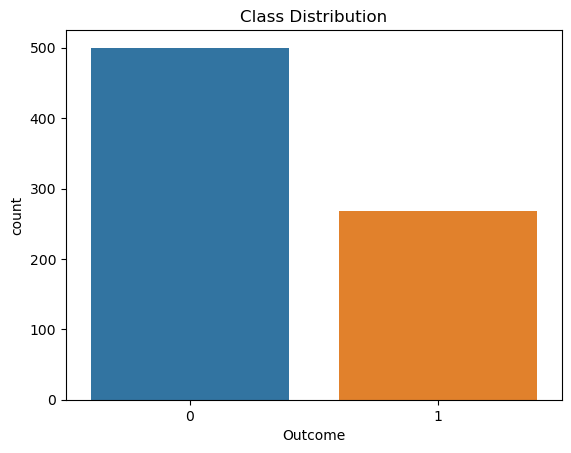

In [9]:
# Visualize class distribution
sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution')
plt.show()

## Class Distribution

### Class Distribution:
- **Class 0**: There are 500 instances in the dataset where the `Outcome` variable is 0, indicating individuals without diabetes.
- **Class 1**: There are 268 instances in the dataset where the `Outcome` variable is 1, indicating individuals with diabetes.

### Class Percentage Distribution:
- **Class 0**: Represents approximately 65.10% of the total instances in the dataset.
- **Class 1**: Represents approximately 34.90% of the total instances in the dataset.

These distributions provide insights into the imbalance between the two classes (no diabetes vs. diabetes) in the dataset. Class 0 (no diabetes) is more prevalent, comprising about 65.10% of the dataset, while Class 1 (diabetes) makes up approximately 34.90%.


### Imbalance Implications

The dataset is highly imbalanced, with non-fraudulent transactions vastly outnumbering fraudulent transactions. This imbalance poses several challenges for machine learning models:

- **Bias-Variance Trade-off**: Models may achieve high accuracy by predicting the majority class but fail to generalize well on the minority class.
- **Overfitting**: The model might overfit to the majority class and consider the minority class as noise.
- **Evaluation Metrics**: Accuracy alone is not a good measure of performance in this case. Metrics like precision, recall, F1-score, and area under the ROC curve are more informative for imbalanced datasets.

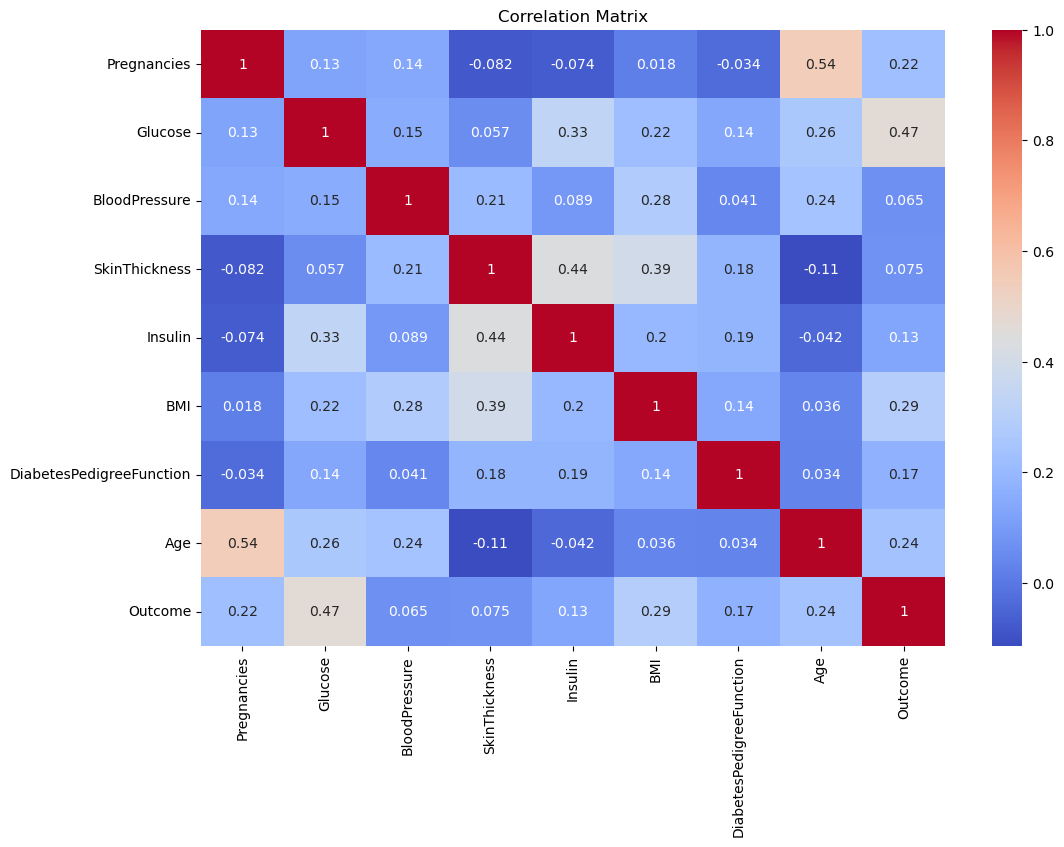

In [10]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

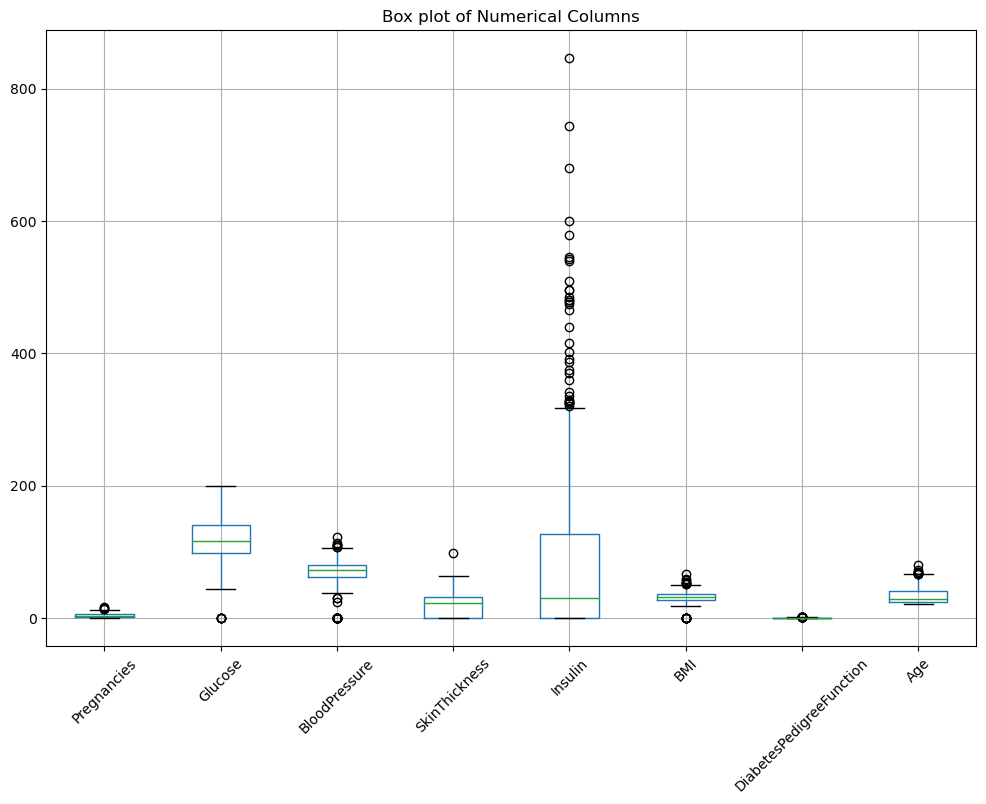

In [11]:
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(12, 8))
df[numerical_columns].boxplot()
plt.title('Box plot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

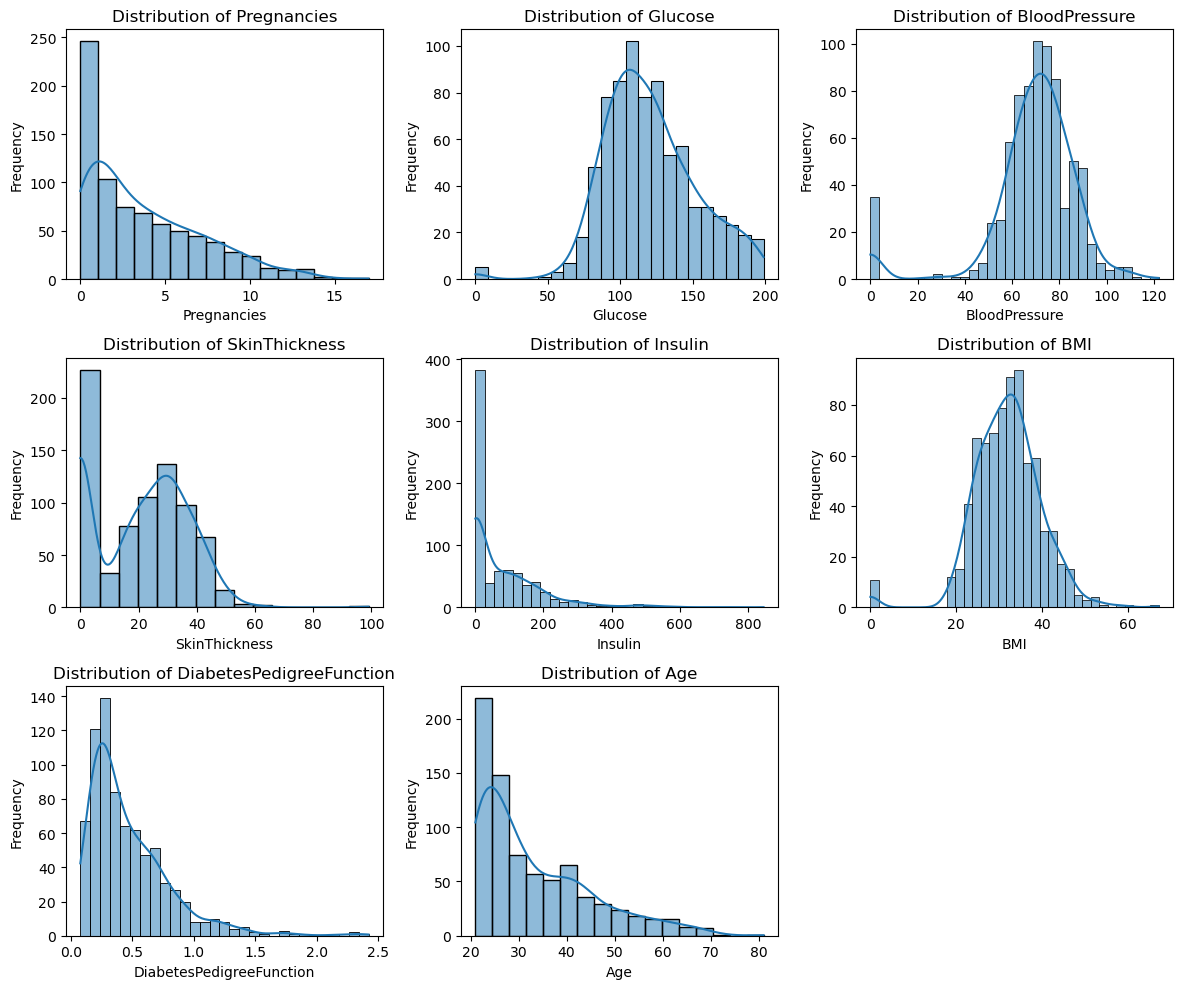

In [12]:
# Distribution plots for numerical variables
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

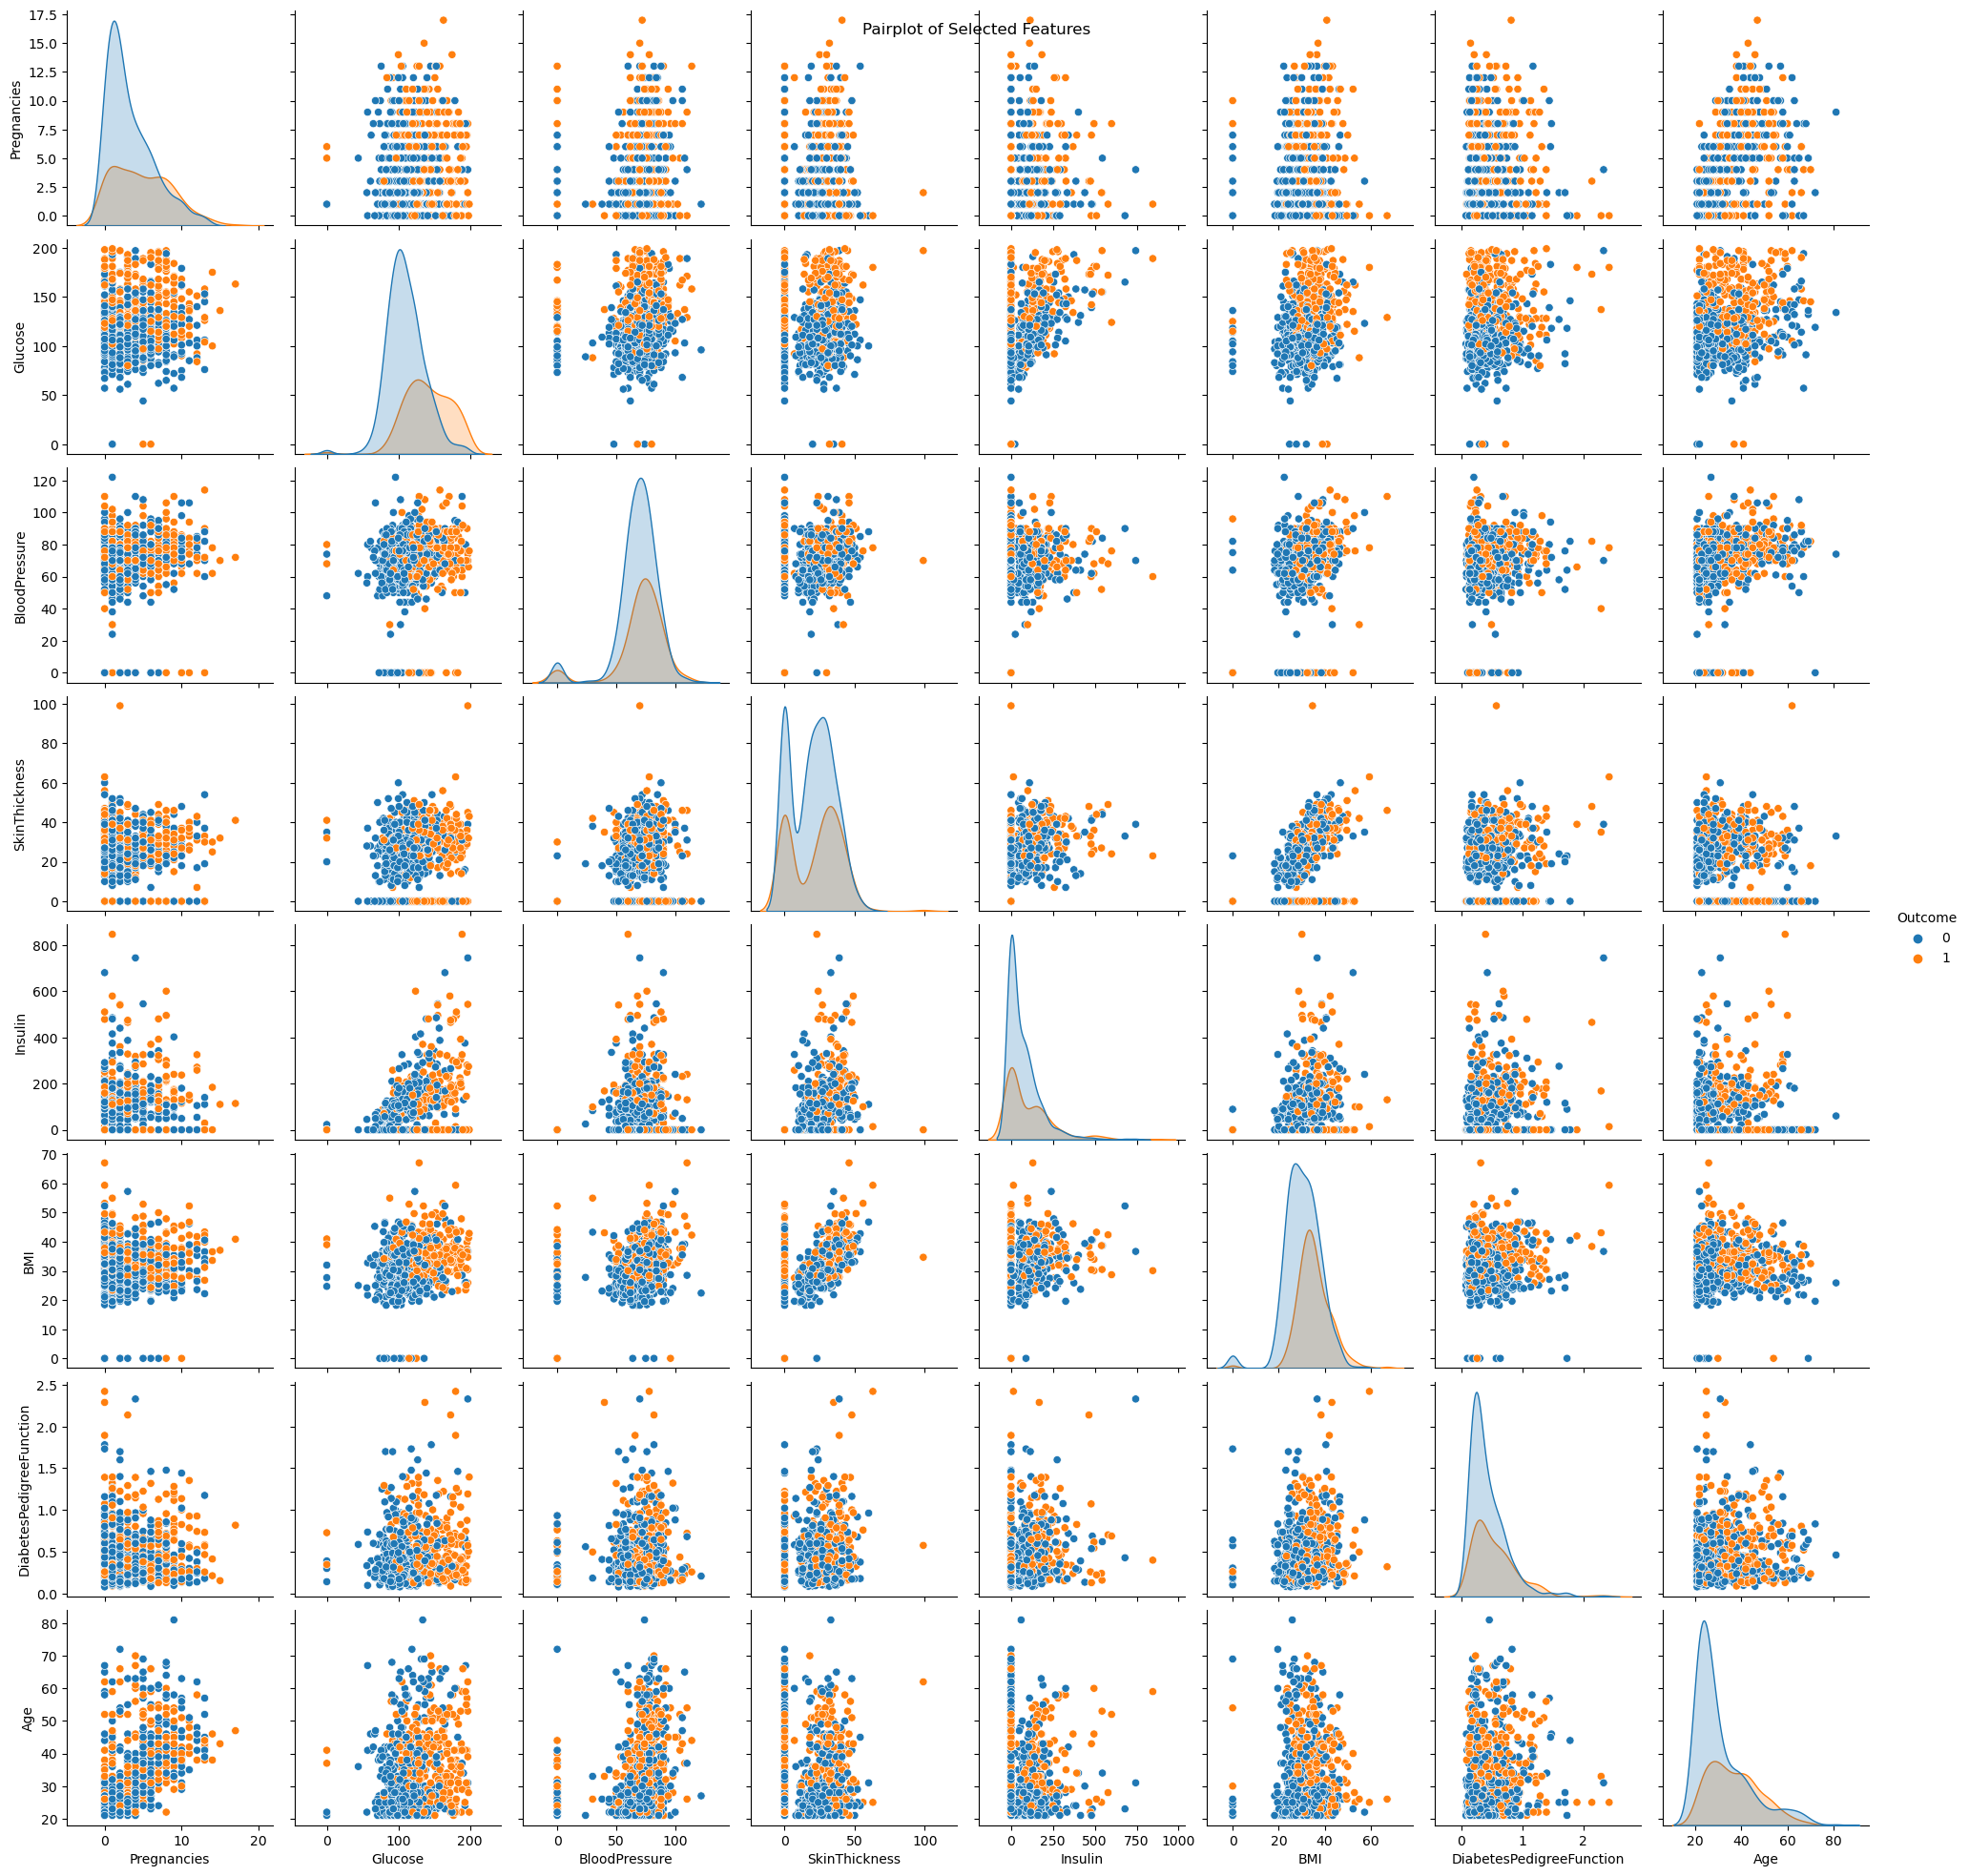

In [13]:
# Assuming df is your DataFrame containing the features and 'Outcome' column
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features')
plt.show()

## Feature Selection

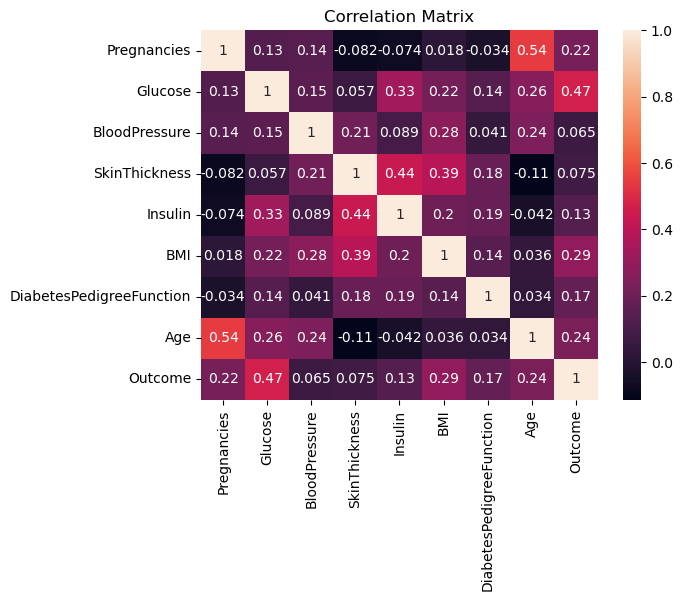

Selected Features:  ['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin']


In [14]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Select features based on correlation with target variable
selected_features = correlation_matrix['Outcome'].abs().sort_values(ascending=False).index[1:7].tolist()
print("Selected Features: ", selected_features)

### Feature Selection Technique

**Correlation-based Feature Selection (CFS)**
- **Simplicity**: Effective for initial analysis.
- **Relevance**: Selects highly correlated features with the target and low inter-correlation among features.
- **Efficiency**: Reduces dimensionality, improving model performance and training speed.

## Cross-Validation and Sample Split

In [15]:
# Define stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define train/validation/test split
X = df[selected_features]
y = df['Outcome']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 537
Validation set size: 154
Test set size: 77


In [16]:
X_train.head()

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin
209,184,35.5,41,7,0.355,0
176,85,31.2,42,6,0.382,0
147,106,30.5,34,2,1.400,119
454,100,37.8,24,2,0.498,105
636,104,28.8,48,5,0.153,0


In [17]:
X_val.head()

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin
32,88,24.8,22,3,0.267,54
471,137,33.2,22,0,0.170,0
82,83,29.3,36,7,0.767,71
596,67,45.3,46,0,0.194,0
373,105,34.9,25,2,0.225,94


### Cross-Validation

**Stratified K-Fold Cross-Validation**
- **Stratification**: Ensures proportional representation of classes in each fold.
- **Robustness**: Provides comprehensive model evaluation, reducing overfitting risk.
- **Parameters**:
  - **Number of Folds**: 5

### Sample Sizes

**Training/Validation/Test Split**: 70/20/10
- **Training Set (70%)**: Sufficient data for learning.
- **Validation Set (20%)**: For hyperparameter tuning and evaluation.
- **Test Set (10%)**: For unbiased evaluation of final model performance.

# Baseline execution on imbalanced data

## Model Training and Evaluation

## **Logistic Regression**

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Define the model
model_lr = LogisticRegression(random_state=42)

# Train the model on the training set
model_lr.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val = model_lr.predict(X_val)
y_pred_proba_val = model_lr.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics for the validation set
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)
mcc_val = matthews_corrcoef(y_val, y_pred_val)

# Evaluate the model on the test set
y_pred_test = model_lr.predict(X_test)
y_pred_proba_test = model_lr.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the test set
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)
mcc_test = matthews_corrcoef(y_test, y_pred_test)

# Display results for the validation set
results_val = {
    "Dataset": "Validation",
    "Precision": precision_val,
    "Recall": recall_val,
    "F1-Score": f1_val,
    "AUC-ROC": auc_val,
    "MCC": mcc_val
}

# Display results for the test set
results_test = {
    "Dataset": "Test",
    "Precision": precision_test,
    "Recall": recall_test,
    "F1-Score": f1_test,
    "AUC-ROC": auc_test,
    "MCC": mcc_test
}

print("Validation Set Results:")
print(results_val)
print("\nTest Set Results:")
print(results_test)

Validation Set Results:
{'Dataset': 'Validation', 'Precision': 0.6590909090909091, 'Recall': 0.5370370370370371, 'F1-Score': 0.5918367346938775, 'AUC-ROC': 0.8375925925925927, 'MCC': 0.40881490876633847}

Test Set Results:
{'Dataset': 'Test', 'Precision': 0.65, 'Recall': 0.48148148148148145, 'F1-Score': 0.5531914893617021, 'AUC-ROC': 0.817037037037037, 'MCC': 0.3716050570007949}


## **Random Forest**

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Define the model
model_rf = RandomForestClassifier(random_state=42)

# Train the model on the training set
model_rf.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val_rf = model_rf.predict(X_val)
y_pred_proba_val_rf = model_rf.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics for the validation set
precision_val_rf = precision_score(y_val, y_pred_val_rf)
recall_val_rf = recall_score(y_val, y_pred_val_rf)
f1_val_rf = f1_score(y_val, y_pred_val_rf)
auc_val_rf = roc_auc_score(y_val, y_pred_proba_val_rf)
mcc_val_rf = matthews_corrcoef(y_val, y_pred_val_rf)

# Evaluate the model on the test set
y_pred_test_rf = model_rf.predict(X_test)
y_pred_proba_test_rf = model_rf.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the test set
precision_test_rf = precision_score(y_test, y_pred_test_rf)
recall_test_rf = recall_score(y_test, y_pred_test_rf)
f1_test_rf = f1_score(y_test, y_pred_test_rf)
auc_test_rf = roc_auc_score(y_test, y_pred_proba_test_rf)
mcc_test_rf = matthews_corrcoef(y_test, y_pred_test_rf)

# Display results for the validation set
results_val_rf = {
    "Dataset": "Validation",
    "Precision": precision_val_rf,
    "Recall": recall_val_rf,
    "F1-Score": f1_val_rf,
    "AUC-ROC": auc_val_rf,
    "MCC": mcc_val_rf
}

# Display results for the test set
results_test_rf = {
    "Dataset": "Test",
    "Precision": precision_test_rf,
    "Recall": recall_test_rf,
    "F1-Score": f1_test_rf,
    "AUC-ROC": auc_test_rf,
    "MCC": mcc_test_rf
}

print("Validation Set Results for Random Forest:")
print(results_val_rf)
print("\nTest Set Results for Random Forest:")
print(results_test_rf)

Validation Set Results for Random Forest:
{'Dataset': 'Validation', 'Precision': 0.6666666666666666, 'Recall': 0.6296296296296297, 'F1-Score': 0.6476190476190476, 'AUC-ROC': 0.8368518518518518, 'MCC': 0.46601639597086725}

Test Set Results for Random Forest:
{'Dataset': 'Test', 'Precision': 0.6842105263157895, 'Recall': 0.48148148148148145, 'F1-Score': 0.5652173913043478, 'AUC-ROC': 0.797037037037037, 'MCC': 0.4000940939272025}


## **Gradient Boosting**

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Initialize Gradient Boosting
model_gb = GradientBoostingClassifier(random_state=42)

# Train the model on the training set
model_gb.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val_gb = model_gb.predict(X_val)
y_pred_proba_val_gb = model_gb.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics for the validation set
precision_val_gb = precision_score(y_val, y_pred_val_gb)
recall_val_gb = recall_score(y_val, y_pred_val_gb)
f1_val_gb = f1_score(y_val, y_pred_val_gb)
auc_val_gb = roc_auc_score(y_val, y_pred_proba_val_gb)
mcc_val_gb = matthews_corrcoef(y_val, y_pred_val_gb)

# Evaluate the model on the test set
y_pred_test_gb = model_gb.predict(X_test)
y_pred_proba_test_gb = model_gb.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the test set
precision_test_gb = precision_score(y_test, y_pred_test_gb)
recall_test_gb = recall_score(y_test, y_pred_test_gb)
f1_test_gb = f1_score(y_test, y_pred_test_gb)
auc_test_gb = roc_auc_score(y_test, y_pred_proba_test_gb)
mcc_test_gb = matthews_corrcoef(y_test, y_pred_test_gb)

# Display results for the validation set
results_val_gb = {
    "Dataset": "Validation",
    "Precision": precision_val_gb,
    "Recall": recall_val_gb,
    "F1-Score": f1_val_gb,
    "AUC-ROC": auc_val_gb,
    "MCC": mcc_val_gb
}

# Display results for the test set
results_test_gb = {
    "Dataset": "Test",
    "Precision": precision_test_gb,
    "Recall": recall_test_gb,
    "F1-Score": f1_test_gb,
    "AUC-ROC": auc_test_gb,
    "MCC": mcc_test_gb
}

print("Validation Set Results for Gradient Boosting:")
print(results_val_gb)
print("\nTest Set Results for Gradient Boosting:")
print(results_test_gb)

Validation Set Results for Gradient Boosting:
{'Dataset': 'Validation', 'Precision': 0.7021276595744681, 'Recall': 0.6111111111111112, 'F1-Score': 0.6534653465346535, 'AUC-ROC': 0.8599999999999999, 'MCC': 0.488179355005863}

Test Set Results for Gradient Boosting:
{'Dataset': 'Test', 'Precision': 0.7142857142857143, 'Recall': 0.5555555555555556, 'F1-Score': 0.625, 'AUC-ROC': 0.7985185185185185, 'MCC': 0.4666666666666667}


## **XGBoost**

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Define the model
model_xgb = XGBClassifier(scale_pos_weight=(len(y) - sum(y)) / sum(y),
                          use_label_encoder=False,
                          eval_metric='logloss',
                          random_state=42)

# Train the model on the training set
model_xgb.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val_xgb = model_xgb.predict(X_val)
y_pred_proba_val_xgb = model_xgb.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics for the validation set
precision_val_xgb = precision_score(y_val, y_pred_val_xgb)
recall_val_xgb = recall_score(y_val, y_pred_val_xgb)
f1_val_xgb = f1_score(y_val, y_pred_val_xgb)
auc_val_xgb = roc_auc_score(y_val, y_pred_proba_val_xgb)
mcc_val_xgb = matthews_corrcoef(y_val, y_pred_val_xgb)

# Evaluate the model on the test set
y_pred_test_xgb = model_xgb.predict(X_test)
y_pred_proba_test_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the test set
precision_test_xgb = precision_score(y_test, y_pred_test_xgb)
recall_test_xgb = recall_score(y_test, y_pred_test_xgb)
f1_test_xgb = f1_score(y_test, y_pred_test_xgb)
auc_test_xgb = roc_auc_score(y_test, y_pred_proba_test_xgb)
mcc_test_xgb = matthews_corrcoef(y_test, y_pred_test_xgb)

# Display results for the validation set
results_val_xgb = {
    "Dataset": "Validation",
    "Precision": precision_val_xgb,
    "Recall": recall_val_xgb,
    "F1-Score": f1_val_xgb,
    "AUC-ROC": auc_val_xgb,
    "MCC": mcc_val_xgb
}

# Display results for the test set
results_test_xgb = {
    "Dataset": "Test",
    "Precision": precision_test_xgb,
    "Recall": recall_test_xgb,
    "F1-Score": f1_test_xgb,
    "AUC-ROC": auc_test_xgb,
    "MCC": mcc_test_xgb
}

print("Validation Set Results for XGBoost:")
print(results_val_xgb)
print("\nTest Set Results for XGBoost:")
print(results_test_xgb)

Validation Set Results for XGBoost:
{'Dataset': 'Validation', 'Precision': 0.6226415094339622, 'Recall': 0.6111111111111112, 'F1-Score': 0.616822429906542, 'AUC-ROC': 0.8127777777777778, 'MCC': 0.41291196993125556}

Test Set Results for XGBoost:
{'Dataset': 'Test', 'Precision': 0.6666666666666666, 'Recall': 0.4444444444444444, 'F1-Score': 0.5333333333333333, 'AUC-ROC': 0.7459259259259259, 'MCC': 0.3658010669613767}


## **Neural Network (Multi-layer Perceptron)**

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Define the model
model_nn = MLPClassifier(random_state=42)

# Train the model on the training set
model_nn.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val_nn = model_nn.predict(X_val)
# Check if the model has the predict_proba method
y_pred_proba_val_nn = model_nn.predict_proba(X_val)[:, 1] if hasattr(model_nn, "predict_proba") else None

# Calculate evaluation metrics for the validation set
precision_val_nn = precision_score(y_val, y_pred_val_nn)
recall_val_nn = recall_score(y_val, y_pred_val_nn)
f1_val_nn = f1_score(y_val, y_pred_val_nn)
auc_val_nn = roc_auc_score(y_val, y_pred_proba_val_nn) if y_pred_proba_val_nn is not None else None
mcc_val_nn = matthews_corrcoef(y_val, y_pred_val_nn)

# Evaluate the model on the test set
y_pred_test_nn = model_nn.predict(X_test)
# Check if the model has the predict_proba method
y_pred_proba_test_nn = model_nn.predict_proba(X_test)[:, 1] if hasattr(model_nn, "predict_proba") else None

# Calculate evaluation metrics for the test set
precision_test_nn = precision_score(y_test, y_pred_test_nn)
recall_test_nn = recall_score(y_test, y_pred_test_nn)
f1_test_nn = f1_score(y_test, y_pred_test_nn)
auc_test_nn = roc_auc_score(y_test, y_pred_proba_test_nn) if y_pred_proba_test_nn is not None else None
mcc_test_nn = matthews_corrcoef(y_test, y_pred_test_nn)

# Display results for the validation set
results_val_nn = {
    "Dataset": "Validation",
    "Precision": precision_val_nn,
    "Recall": recall_val_nn,
    "F1-Score": f1_val_nn,
    "AUC-ROC": auc_val_nn,
    "MCC": mcc_val_nn
}

# Display results for the test set
results_test_nn = {
    "Dataset": "Test",
    "Precision": precision_test_nn,
    "Recall": recall_test_nn,
    "F1-Score": f1_test_nn,
    "AUC-ROC": auc_test_nn,
    "MCC": mcc_test_nn
}

print("Validation Set Results for Neural Network:")
print(results_val_nn)
print("\nTest Set Results for Neural Network:")
print(results_test_nn)

Validation Set Results for Neural Network:
{'Dataset': 'Validation', 'Precision': 0.47368421052631576, 'Recall': 0.3333333333333333, 'F1-Score': 0.391304347826087, 'AUC-ROC': 0.6957407407407408, 'MCC': 0.14757569038298454}

Test Set Results for Neural Network:
{'Dataset': 'Test', 'Precision': 0.7777777777777778, 'Recall': 0.5185185185185185, 'F1-Score': 0.6222222222222222, 'AUC-ROC': 0.7792592592592593, 'MCC': 0.4944160539751941}


## Classification Algorithms

1. **Logistic Regression**
   - **Simple and interpretable baseline model.**

2. **Random Forest**
   - **Handles non-linear relationships and is robust to overfitting.**

3. **Gradient Boosting (GB)**
   - **Builds sequentially to correct errors, effective for imbalanced datasets, high accuracy.**.

4. **XGBoost (Extreme Gradient Boosting):**
   - **Effective for imbalanced datasets, high accuracy.**

5. **Neural Network (MLPClassifier)**
   - **Captures complex patterns and interactions in data.**

## Performance Metrics Related to Minority Class

1. **Precision**
   - Accuracy of positive predictions (fraud cases).

2. **Recall (Sensitivity)**
   - Ability to identify actual fraud cases.

3. **F1-Score**
   - Balanced measure of precision and recall.

4. **Area Under the ROC Curve (AUC-ROC)**
   - Discrimination ability across all threshold values.

5. **Matthews Correlation Coefficient (MCC)**
   - Comprehensive performance measure, even with imbalanced classes.

# Apply SMOTE to Balance Classes

In [23]:
# !pip install scikit-learn==1.0.2
# !pip install imbalanced-learn==0.8.1

In [24]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Apply SMOTE
smote = SMOTE(random_state=42)
X_re_smote, y_re_smote = smote.fit_resample(X_train, y_train)


# Convert the resampled data to a DataFrame
resampled_data = pd.DataFrame(X_re_smote, columns=X.columns)
resampled_data['Outcome'] = y_re_smote


# Save the resampled data to a CSV file
resampled_data.to_csv('Diabetes_Smote.csv', index=False)

In [25]:
import pandas as pd
df = pd.read_csv("D:/ML-Project/Balanced Datasets/Diabetes_Smote.csv")
df.head()

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin,Outcome
0,184,35.5,41,7,0.355,0,1
1,85,31.2,42,6,0.382,0,0
2,106,30.5,34,2,1.400,119,0
3,100,37.8,24,2,0.498,105,0
4,104,28.8,48,5,0.153,0,0


In [26]:
# Check the distribution of class labels
class_distribution = df['Outcome'].value_counts()
print("Class distribution:")
print(class_distribution)

# Calculate and print the percentage distribution
class_percentage = df['Outcome'].value_counts(normalize=True) * 100
print("\nClass percentage distribution:")
print(class_percentage)

Class distribution:
1    350
0    350
Name: Outcome, dtype: int64

Class percentage distribution:
1    50.0
0    50.0
Name: Outcome, dtype: float64


Here we can see that classes are balanced now.

In [27]:
X_re_smote.head()

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin,Outcome
0,184,35.5,41,7,0.355,0,1
1,85,31.2,42,6,0.382,0,0
2,106,30.5,34,2,1.400,119,0
3,100,37.8,24,2,0.498,105,0
4,104,28.8,48,5,0.153,0,0


In [28]:
X_re_smote = X_re_smote.drop(columns=['Outcome'])

In [29]:
X_re_smote.head()

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin
0,184,35.5,41,7,0.355,0
1,85,31.2,42,6,0.382,0
2,106,30.5,34,2,1.400,119
3,100,37.8,24,2,0.498,105
4,104,28.8,48,5,0.153,0


# Train and Evaluate Models on Balanced Data

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Define the model
model_lr = LogisticRegression(random_state=42)

# Train the model
model_lr.fit(X_re_smote, y_re_smote)

# Evaluate the model on the validation set
y_pred_lr = model_lr.predict(X_val)
y_pred_proba_lr = model_lr.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics for the validation set
precision_lr = precision_score(y_val, y_pred_lr)
recall_lr = recall_score(y_val, y_pred_lr)
f1_lr = f1_score(y_val, y_pred_lr)
auc_lr = roc_auc_score(y_val, y_pred_proba_lr)
mcc_lr = matthews_corrcoef(y_val, y_pred_lr)
accuracy_lr = accuracy_score(y_val, y_pred_lr)

# Evaluate the model on the test set
y_pred_test_lr = model_lr.predict(X_test)
y_pred_proba_test_lr = model_lr.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the test set
precision_test_lr = precision_score(y_test, y_pred_test_lr)
recall_test_lr = recall_score(y_test, y_pred_test_lr)
f1_test_lr = f1_score(y_test, y_pred_test_lr)
auc_test_lr = roc_auc_score(y_test, y_pred_proba_test_lr)
mcc_test_lr = matthews_corrcoef(y_test, y_pred_test_lr)
accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)


# Display results for the validation set
results_lr = {
    "Model": "Logistic Regression (Validation Set)",
    "Accuracy": accuracy_lr,
    "Precision": precision_lr,
    "Recall": recall_lr,
    "F1-Score": f1_lr,
    "AUC-ROC": auc_lr,
    "MCC": mcc_lr
}

# Display results for the test set
results_test_lr = {
    "Model": "Logistic Regression (Test Set)",
    "Accuracy": accuracy_test_lr,
    "Precision": precision_test_lr,
    "Recall": recall_test_lr,
    "F1-Score": f1_test_lr,
    "AUC-ROC": auc_test_lr,
    "MCC": mcc_test_lr
}

print("Validation Set Results for Logistic Regression:")
print(results_lr)
print("\nTest Set Results for Logistic Regression:")
print(results_test_lr)

Validation Set Results for Logistic Regression:
{'Model': 'Logistic Regression (Validation Set)', 'Accuracy': 0.7662337662337663, 'Precision': 0.6451612903225806, 'Recall': 0.7407407407407407, 'F1-Score': 0.6896551724137931, 'AUC-ROC': 0.8435185185185186, 'MCC': 0.5066740688254677}

Test Set Results for Logistic Regression:
{'Model': 'Logistic Regression (Test Set)', 'Accuracy': 0.7272727272727273, 'Precision': 0.6153846153846154, 'Recall': 0.5925925925925926, 'F1-Score': 0.6037735849056604, 'AUC-ROC': 0.8066666666666666, 'MCC': 0.3961295342422729}


## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, accuracy_score

# Define the model
model_rf = RandomForestClassifier(random_state=42)

# Train the model
model_rf.fit(X_re_smote, y_re_smote)

# Evaluate the model on the validation set
y_pred_rf = model_rf.predict(X_val)
y_pred_proba_rf = model_rf.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics for the validation set
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)
auc_rf = roc_auc_score(y_val, y_pred_proba_rf)
mcc_rf = matthews_corrcoef(y_val, y_pred_rf)
accuracy_rf = accuracy_score(y_val, y_pred_rf)

# Evaluate the model on the test set
y_pred_test_rf = model_rf.predict(X_test)
y_pred_proba_test_rf = model_rf.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the test set
precision_test_rf = precision_score(y_test, y_pred_test_rf)
recall_test_rf = recall_score(y_test, y_pred_test_rf)
f1_test_rf = f1_score(y_test, y_pred_test_rf)
auc_test_rf = roc_auc_score(y_test, y_pred_proba_test_rf)
mcc_test_rf = matthews_corrcoef(y_test, y_pred_test_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

# Display results for the validation set
results_rf = {
    "Model": "Random Forest (Validation Set)",
    "Accuracy": accuracy_rf,
    "Precision": precision_rf,
    "Recall": recall_rf,
    "F1-Score": f1_rf,
    "AUC-ROC": auc_rf,
    "MCC": mcc_rf
}

# Display results for the test set
results_test_rf = {
    "Model": "Random Forest (Test Set)",
    "Accuracy": accuracy_test_rf,
    "Precision": precision_test_rf,
    "Recall": recall_test_rf,
    "F1-Score": f1_test_rf,
    "AUC-ROC": auc_test_rf,
    "MCC": mcc_test_rf
}

print("Validation Set Results for Random Forest:")
print(results_rf)
print("\nTest Set Results for Random Forest:")
print(results_test_rf)

Validation Set Results for Random Forest:
{'Model': 'Random Forest (Validation Set)', 'Accuracy': 0.7467532467532467, 'Precision': 0.6229508196721312, 'Recall': 0.7037037037037037, 'F1-Score': 0.6608695652173913, 'AUC-ROC': 0.8486111111111111, 'MCC': 0.4621652292352401}

Test Set Results for Random Forest:
{'Model': 'Random Forest (Test Set)', 'Accuracy': 0.7792207792207793, 'Precision': 0.75, 'Recall': 0.5555555555555556, 'F1-Score': 0.6382978723404256, 'AUC-ROC': 0.8351851851851853, 'MCC': 0.4957421042418413}


## XGBoost

In [32]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, accuracy_score

# Define the model
model_xgb = XGBClassifier(scale_pos_weight=(len(y) - sum(y)) / sum(y),
                          use_label_encoder=False,
                          eval_metric='logloss',
                          random_state=42)

# Train the model
model_xgb.fit(X_re_smote, y_re_smote)

# Evaluate the model on the validation set
y_pred_xgb_val = model_xgb.predict(X_val)
y_pred_proba_xgb_val = model_xgb.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics for the validation set
precision_xgb_val = precision_score(y_val, y_pred_xgb_val)
recall_xgb_val = recall_score(y_val, y_pred_xgb_val)
f1_xgb_val = f1_score(y_val, y_pred_xgb_val)
auc_xgb_val = roc_auc_score(y_val, y_pred_proba_xgb_val)
mcc_xgb_val = matthews_corrcoef(y_val, y_pred_xgb_val)
accuracy_xgb_val = accuracy_score(y_val, y_pred_xgb_val)

# Evaluate the model on the test set
y_pred_xgb_test = model_xgb.predict(X_test)
y_pred_proba_xgb_test = model_xgb.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the test set
precision_xgb_test = precision_score(y_test, y_pred_xgb_test)
recall_xgb_test = recall_score(y_test, y_pred_xgb_test)
f1_xgb_test = f1_score(y_test, y_pred_xgb_test)
auc_xgb_test = roc_auc_score(y_test, y_pred_proba_xgb_test)
mcc_xgb_test = matthews_corrcoef(y_test, y_pred_xgb_test)
accuracy_xgb_test = accuracy_score(y_test, y_pred_xgb_test)

# Display results for the validation set
results_xgb_val = {
    "Model": "XGBoost (Validation Set)",
    "Accuracy": accuracy_xgb_val,
    "Precision": precision_xgb_val,
    "Recall": recall_xgb_val,
    "F1-Score": f1_xgb_val,
    "AUC-ROC": auc_xgb_val,
    "MCC": mcc_xgb_val
}

# Display results for the test set
results_xgb_test = {
    "Model": "XGBoost (Test Set)",
    "Accuracy": accuracy_xgb_test,
    "Precision": precision_xgb_test,
    "Recall": recall_xgb_test,
    "F1-Score": f1_xgb_test,
    "AUC-ROC": auc_xgb_test,
    "MCC": mcc_xgb_test
}

print("Validation Set Results for XGBoost:")
print(results_xgb_val)

print("\nTest Set Results for XGBoost:")
print(results_xgb_test)

Validation Set Results for XGBoost:
{'Model': 'XGBoost (Validation Set)', 'Accuracy': 0.7337662337662337, 'Precision': 0.6065573770491803, 'Recall': 0.6851851851851852, 'F1-Score': 0.6434782608695652, 'AUC-ROC': 0.8342592592592593, 'MCC': 0.43434136476994417}

Test Set Results for XGBoost:
{'Model': 'XGBoost (Test Set)', 'Accuracy': 0.7532467532467533, 'Precision': 0.6666666666666666, 'Recall': 0.5925925925925926, 'F1-Score': 0.6274509803921569, 'AUC-ROC': 0.7874074074074074, 'MCC': 0.44565871858907996}


## Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, accuracy_score

# Initialize Gradient Boosting
model_gb = GradientBoostingClassifier(random_state=42)

# Train the model
model_gb.fit(X_re_smote, y_re_smote)

# Predict on validation set
y_pred_gb_val = model_gb.predict(X_val)
y_pred_proba_gb_val = model_gb.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics for validation set
precision_gb_val = precision_score(y_val, y_pred_gb_val)
recall_gb_val = recall_score(y_val, y_pred_gb_val)
f1_gb_val = f1_score(y_val, y_pred_gb_val)
auc_gb_val = roc_auc_score(y_val, y_pred_proba_gb_val)
mcc_gb_val = matthews_corrcoef(y_val, y_pred_gb_val)
accuracy_gb_val = accuracy_score(y_val, y_pred_gb_val)

# Predict on test set
y_pred_gb_test = model_gb.predict(X_test)
y_pred_proba_gb_test = model_gb.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for test set
precision_gb_test = precision_score(y_test, y_pred_gb_test)
recall_gb_test = recall_score(y_test, y_pred_gb_test)
f1_gb_test = f1_score(y_test, y_pred_gb_test)
auc_gb_test = roc_auc_score(y_test, y_pred_proba_gb_test)
mcc_gb_test = matthews_corrcoef(y_test, y_pred_gb_test)
accuracy_gb_test = accuracy_score(y_test, y_pred_gb_test)

# Display results for validation set
results_gb_val = {
    "Model": "Gradient Boosting (Validation Set)",
    "Accuracy": accuracy_gb_val,
    "Precision": precision_gb_val,
    "Recall": recall_gb_val,
    "F1-Score": f1_gb_val,
    "AUC-ROC": auc_gb_val,
    "MCC": mcc_gb_val
}

# Display results for test set
results_gb_test = {
    "Model": "Gradient Boosting (Test Set)",
    "Accuracy": accuracy_gb_test,
    "Precision": precision_gb_test,
    "Recall": recall_gb_test,
    "F1-Score": f1_gb_test,
    "AUC-ROC": auc_gb_test,
    "MCC": mcc_gb_test
}

print("Validation Set Results for Gradient Boosting:")
print(results_gb_val)
print("\nTest Set Results for Gradient Boosting:")
print(results_gb_test)

Validation Set Results for Gradient Boosting:
{'Model': 'Gradient Boosting (Validation Set)', 'Accuracy': 0.7792207792207793, 'Precision': 0.65625, 'Recall': 0.7777777777777778, 'F1-Score': 0.711864406779661, 'AUC-ROC': 0.8677777777777778, 'MCC': 0.5400660110544787}

Test Set Results for Gradient Boosting:
{'Model': 'Gradient Boosting (Test Set)', 'Accuracy': 0.7272727272727273, 'Precision': 0.625, 'Recall': 0.5555555555555556, 'F1-Score': 0.5882352941176471, 'AUC-ROC': 0.8103703703703704, 'MCC': 0.3868989217888074}


## Neural Network (Multi-layer Perceptron)

In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, accuracy_score

# Define the model
model_nn = MLPClassifier(random_state=42)

# Train the model
model_nn.fit(X_re_smote, y_re_smote)

# Evaluate the model on the validation set
y_pred_nn_val = model_nn.predict(X_val)
# MLPClassifier does not have predict_proba directly, so you might need to adjust your code accordingly
y_pred_proba_nn_val = model_nn.predict_proba(X_val)[:, 1] if hasattr(model_nn, "predict_proba") else None

# Calculate evaluation metrics for the validation set
precision_nn_val = precision_score(y_val, y_pred_nn_val)
recall_nn_val = recall_score(y_val, y_pred_nn_val)
f1_nn_val = f1_score(y_val, y_pred_nn_val)
auc_nn_val = roc_auc_score(y_val, y_pred_proba_nn_val) if y_pred_proba_nn_val is not None else None
mcc_nn_val = matthews_corrcoef(y_val, y_pred_nn_val)
accuracy_nn_val = accuracy_score(y_val, y_pred_nn_val)

# Evaluate the model on the test set
y_pred_nn_test = model_nn.predict(X_test)
# MLPClassifier does not have predict_proba directly, so you might need to adjust your code accordingly
y_pred_proba_nn_test = model_nn.predict_proba(X_test)[:, 1] if hasattr(model_nn, "predict_proba") else None

# Calculate evaluation metrics for the test set
precision_nn_test = precision_score(y_test, y_pred_nn_test)
recall_nn_test = recall_score(y_test, y_pred_nn_test)
f1_nn_test = f1_score(y_test, y_pred_nn_test)
auc_nn_test = roc_auc_score(y_test, y_pred_proba_nn_test) if y_pred_proba_nn_test is not None else None
mcc_nn_test = matthews_corrcoef(y_test, y_pred_nn_test)
accuracy_nn_test = accuracy_score(y_test, y_pred_nn_test)

# Display results for the validation set
results_nn_val = {
    "Model": "Neural Network (Validation Set)",
    "Accuracy": accuracy_nn_val,
    "Precision": precision_nn_val,
    "Recall": recall_nn_val,
    "F1-Score": f1_nn_val,
    "AUC-ROC": auc_nn_val,
    "MCC": mcc_nn_val
}

# Display results for the test set
results_nn_test = {
    "Model": "Neural Network (Test Set)",
    "Accuracy": accuracy_nn_test,
    "Precision": precision_nn_test,
    "Recall": recall_nn_test,
    "F1-Score": f1_nn_test,
    "AUC-ROC": auc_nn_test,
    "MCC": mcc_nn_test
}

print("Validation Set Results for Neural Network:")
print(results_nn_val)
print("\nTest Set Results for Neural Network:")
print(results_nn_test)

Validation Set Results for Neural Network:
{'Model': 'Neural Network (Validation Set)', 'Accuracy': 0.5324675324675324, 'Precision': 0.4224137931034483, 'Recall': 0.9074074074074074, 'F1-Score': 0.5764705882352941, 'AUC-ROC': 0.6603703703703703, 'MCC': 0.2627667153763697}

Test Set Results for Neural Network:
{'Model': 'Neural Network (Test Set)', 'Accuracy': 0.5974025974025974, 'Precision': 0.46296296296296297, 'Recall': 0.9259259259259259, 'F1-Score': 0.6172839506172839, 'AUC-ROC': 0.7674074074074074, 'MCC': 0.36065270875797745}


# **Algorithmic Methods (Class Weighting and Ensemble Methods)**

## Applying Class Weighting

## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define Logistic Regression classifier with class weight
model_lr_weighted = LogisticRegression(class_weight='balanced', random_state=42)

# Train the model
model_lr_weighted.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_lr_weighted_val = model_lr_weighted.predict(X_val)

# Calculate evaluation metrics for the validation set
precision_lr_weighted_val = precision_score(y_val, y_pred_lr_weighted_val)
recall_lr_weighted_val = recall_score(y_val, y_pred_lr_weighted_val)
f1_lr_weighted_val = f1_score(y_val, y_pred_lr_weighted_val)
accuracy_lr_weighted_val = accuracy_score(y_val, y_pred_lr_weighted_val)

# Evaluate the model on the test set
y_pred_lr_weighted_test = model_lr_weighted.predict(X_test)

# Calculate evaluation metrics for the test set
precision_lr_weighted_test = precision_score(y_test, y_pred_lr_weighted_test)
recall_lr_weighted_test = recall_score(y_test, y_pred_lr_weighted_test)
f1_lr_weighted_test = f1_score(y_test, y_pred_lr_weighted_test)
accuracy_lr_weighted_test = accuracy_score(y_test, y_pred_lr_weighted_test)

# Display results for the validation set
results_lr_weighted_val = {
    "Model": "Logistic Regression with Class Weighting (Validation Set)",
    "Accuracy": accuracy_lr_weighted_val,
    "Precision": precision_lr_weighted_val,
    "Recall": recall_lr_weighted_val,
    "F1-Score": f1_lr_weighted_val
}

# Display results for the test set
results_lr_weighted_test = {
    "Model": "Logistic Regression with Class Weighting (Test Set)",
    "Accuracy": accuracy_lr_weighted_test,
    "Precision": precision_lr_weighted_test,
    "Recall": recall_lr_weighted_test,
    "F1-Score": f1_lr_weighted_test   
}

print("Validation Set Results for Logistic Regression with Class Weighting:")
print(results_lr_weighted_val)
print("\nTest Set Results for Logistic Regression with Class Weighting:")
print(results_lr_weighted_test)

Validation Set Results for Logistic Regression with Class Weighting:
{'Model': 'Logistic Regression with Class Weighting (Validation Set)', 'Accuracy': 0.7597402597402597, 'Precision': 0.6349206349206349, 'Recall': 0.7407407407407407, 'F1-Score': 0.6837606837606838}

Test Set Results for Logistic Regression with Class Weighting:
{'Model': 'Logistic Regression with Class Weighting (Test Set)', 'Accuracy': 0.7532467532467533, 'Precision': 0.6538461538461539, 'Recall': 0.6296296296296297, 'F1-Score': 0.6415094339622641}


## Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define Random Forest classifier with class weight
model_rf_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
model_rf_weighted.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_rf_val = model_rf_weighted.predict(X_val)

# Calculate evaluation metrics for the validation set
precision_rf_val = precision_score(y_val, y_pred_rf_val)
recall_rf_val = recall_score(y_val, y_pred_rf_val)
f1_rf_val = f1_score(y_val, y_pred_rf_val)
accuracy_rf_val = accuracy_score(y_val, y_pred_rf_val)

# Display results for the validation set
results_rf_val = {
    "Model": "Random Forest with Class Weighting (Validation Set)",
    "Accuracy": accuracy_rf_val,
    "Precision": precision_rf_val,
    "Recall": recall_rf_val,
    "F1-Score": f1_rf_val
}

# Evaluate the model on the test set
y_pred_rf_test = model_rf_weighted.predict(X_test)

# Calculate evaluation metrics for the test set
precision_rf_test = precision_score(y_test, y_pred_rf_test)
recall_rf_test = recall_score(y_test, y_pred_rf_test)
f1_rf_test = f1_score(y_test, y_pred_rf_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)

# Display results for the test set
results_rf_test = {
    "Model": "Random Forest with Class Weighting (Test Set)",
    "Accuracy": accuracy_rf_test,
    "Precision": precision_rf_test,
    "Recall": recall_rf_test,
    "F1-Score": f1_rf_test
}

print("Validation Set Results for Random Forest with Class Weighting:")
print(results_rf_val)


print("\nTest Set Results for Random Forest with Class Weighting:")
print(results_rf_test)

Validation Set Results for Random Forest with Class Weighting:
{'Model': 'Random Forest with Class Weighting (Validation Set)', 'Accuracy': 0.7532467532467533, 'Precision': 0.6666666666666666, 'Recall': 0.5925925925925926, 'F1-Score': 0.6274509803921569}

Test Set Results for Random Forest with Class Weighting:
{'Model': 'Random Forest with Class Weighting (Test Set)', 'Accuracy': 0.7662337662337663, 'Precision': 0.8, 'Recall': 0.4444444444444444, 'F1-Score': 0.5714285714285714}


## Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define Gradient Boosting classifier with class weight
model_gb_weighted = GradientBoostingClassifier(random_state=42)

# Train the model
model_gb_weighted.fit(X_re_smote, y_re_smote)

# Evaluate the model on the validation set
y_pred_gb_val = model_gb_weighted.predict(X_val)

# Calculate evaluation metrics for the validation set
precision_gb_val = precision_score(y_val, y_pred_gb_val)
recall_gb_val = recall_score(y_val, y_pred_gb_val)
f1_gb_val = f1_score(y_val, y_pred_gb_val)
accuracy_gb_val = accuracy_score(y_val, y_pred_gb_val)

# Evaluate the model on the test set
y_pred_gb_test = model_gb_weighted.predict(X_test)

# Calculate evaluation metrics for the test set
precision_gb_test = precision_score(y_test, y_pred_gb_test)
recall_gb_test = recall_score(y_test, y_pred_gb_test)
f1_gb_test = f1_score(y_test, y_pred_gb_test)
accuracy_gb_test = accuracy_score(y_test, y_pred_gb_test)

# Display results for the validation set
results_gb_val = {
    "Model": "Gradient Boosting with Class Weighting (Validation Set)",
    "Accuracy": accuracy_gb_val,
    "Precision": precision_gb_val,
    "Recall": recall_gb_val,
    "F1-Score": f1_gb_val
}

# Display results for the test set
results_gb_test = {
    "Model": "Gradient Boosting with Class Weighting (Test Set)",
    "Accuracy": accuracy_gb_test,
    "Precision": precision_gb_test,
    "Recall": recall_gb_test,
    "F1-Score": f1_gb_test
}

print("Validation Set Results for Gradient Boosting with Class Weighting:")
print(results_gb_val)
print("\nTest Set Results for Gradient Boosting with Class Weighting:")
print(results_gb_test)

Validation Set Results for Gradient Boosting with Class Weighting:
{'Model': 'Gradient Boosting with Class Weighting (Validation Set)', 'Accuracy': 0.7792207792207793, 'Precision': 0.65625, 'Recall': 0.7777777777777778, 'F1-Score': 0.711864406779661}

Test Set Results for Gradient Boosting with Class Weighting:
{'Model': 'Gradient Boosting with Class Weighting (Test Set)', 'Accuracy': 0.7272727272727273, 'Precision': 0.625, 'Recall': 0.5555555555555556, 'F1-Score': 0.5882352941176471}


## **XGBoost**

In [38]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, accuracy_score

# Calculate class weights
class_weights = (len(y_train) - sum(y_train)) / sum(y_train)

# Define the model with class weights
model_xgb = XGBClassifier(scale_pos_weight=class_weights,
                          use_label_encoder=False,
                          eval_metric='logloss',
                          random_state=42)

# Train the model
model_xgb.fit(X_train, y_train)

# Predict on the validation set
y_pred_val_xgb = model_xgb.predict(X_val)
y_pred_proba_val_xgb = model_xgb.predict_proba(X_val)[:, 1]

# Predict on the test set
y_pred_test_xgb = model_xgb.predict(X_test)
y_pred_proba_test_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the validation set
precision_val_xgb = precision_score(y_val, y_pred_val_xgb)
recall_val_xgb = recall_score(y_val, y_pred_val_xgb)
f1_val_xgb = f1_score(y_val, y_pred_val_xgb)
accuracy_val_xgb = accuracy_score(y_val, y_pred_val_xgb)

# Calculate evaluation metrics for the test set
precision_test_xgb = precision_score(y_test, y_pred_test_xgb)
recall_test_xgb = recall_score(y_test, y_pred_test_xgb)
f1_test_xgb = f1_score(y_test, y_pred_test_xgb)
accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)

# Display results for the validation set
results_val_xgb = {
    "Model": "XGBoost with Class Weights (Validation)",
    "Accuracy": accuracy_val_xgb,
    "Precision": precision_val_xgb,
    "Recall": recall_val_xgb,
    "F1-Score": f1_val_xgb,   
}

# Display results for the test set
results_test_xgb = {
    "Model": "XGBoost with Class Weights (Test)",
    "Accuracy": accuracy_test_xgb,
    "Precision": precision_test_xgb,
    "Recall": recall_test_xgb,
    "F1-Score": f1_test_xgb
}

print("Validation Set Results for XGBoost with Class Weights:")
print(results_val_xgb)
print("\nTest Set Results for XGBoost with Class Weights:")
print(results_test_xgb)

Validation Set Results for XGBoost with Class Weights:
{'Model': 'XGBoost with Class Weights (Validation)', 'Accuracy': 0.7467532467532467, 'Precision': 0.6415094339622641, 'Recall': 0.6296296296296297, 'F1-Score': 0.6355140186915887}

Test Set Results for XGBoost with Class Weights:
{'Model': 'XGBoost with Class Weights (Test)', 'Accuracy': 0.7142857142857143, 'Precision': 0.6190476190476191, 'Recall': 0.48148148148148145, 'F1-Score': 0.5416666666666666}


## **Neural Network (Multi-layer Perceptron)**

In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

# Define individual neural network models
model_nn1 = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
model_nn2 = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='adam', random_state=42)
model_nn3 = MLPClassifier(hidden_layer_sizes=(200,), activation='relu', solver='adam', random_state=42)

# Create a voting classifier with the individual neural network models
voting_clf = VotingClassifier(estimators=[('nn1', model_nn1), ('nn2', model_nn2), ('nn3', model_nn3)], voting='soft')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Evaluate on validation set
y_pred_val = voting_clf.predict(X_val)
y_pred_proba_val = voting_clf.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics for validation set
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)
accuracy_val = accuracy_score(y_val, y_pred_val)

# Evaluate on test set
y_pred_test = voting_clf.predict(X_test)
y_pred_proba_test = voting_clf.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for test set
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Display results for validation set
results_val = {
    "Model": "Neural Network Ensemble (Validation Set)",
    "Accuracy": accuracy_val,
    "Precision": precision_val,
    "Recall": recall_val,
    "F1-Score": f1_val,
    "AUC-ROC": auc_val
}

# Display results for test set
results_test = {
    "Model": "Neural Network Ensemble (Test Set)",
    "Accuracy": accuracy_test,
    "Precision": precision_test,
    "Recall": recall_test,
    "F1-Score": f1_test,
    "AUC-ROC": auc_test
}

print("Validation Set Results for Neural Network Ensemble:")
print(results_val)
print("\nTest Set Results for Neural Network Ensemble:")
print(results_test)

Validation Set Results for Neural Network Ensemble:
{'Model': 'Neural Network Ensemble (Validation Set)', 'Accuracy': 0.6883116883116883, 'Precision': 0.575, 'Recall': 0.42592592592592593, 'F1-Score': 0.48936170212765956, 'AUC-ROC': 0.691111111111111}

Test Set Results for Neural Network Ensemble:
{'Model': 'Neural Network Ensemble (Test Set)', 'Accuracy': 0.7792207792207793, 'Precision': 0.75, 'Recall': 0.5555555555555556, 'F1-Score': 0.6382978723404256, 'AUC-ROC': 0.7518518518518519}


# Cluster Oversampling technique

In [40]:
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

# Assuming X is your feature matrix and y is your target vector

# Step 1: Clustering
n_clusters = 3  # This should be based on the optimal number from your analysis
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)
X = pd.DataFrame(X)
X['Cluster'] = clusters

# Step 2: Apply SMOTE within each cluster
X_resampled_list = []
y_resampled_list = []

for cluster in X['Cluster'].unique():
    X_cluster = X[X['Cluster'] == cluster]
    y_cluster = y[X['Cluster'] == cluster]
    
    print(f"Processing cluster {cluster} with {len(X_cluster)} samples.")

    if len(X_cluster) > 1:
        # Ensure k_neighbors is less than the number of samples in the cluster
        k_neighbors = min(5, len(X_cluster)-1 )
        smote = SMOTE(k_neighbors=k_neighbors, random_state=42)
        try:
            X_res, y_res = smote.fit_resample(X_cluster, y_cluster)
            print(f"SMOTE applied to cluster {cluster}.")
        except ValueError as e:
            print(f"Error in SMOTE for cluster {cluster}: {e}")
            X_res, y_res = X_cluster, y_cluster  # Use original cluster if SMOTE fails
    else:
        # If the cluster is too small, just replicate the samples
        print(f"Cluster {cluster} is too small for SMOTE. Using original samples.")
        X_res, y_res = X_cluster, y_cluster
    
    X_resampled_list.append(X_res)
    y_resampled_list.append(y_res)

# Concatenate all the resampled clusters
X_train_resampled = pd.concat(X_resampled_list, axis=0)
y_train_resampled = pd.concat(y_resampled_list, axis=0)

print("Original shape:", X.shape)
print("Resampled shape:", X_train_resampled.shape)

Processing cluster 1 with 495 samples.
SMOTE applied to cluster 1.
Processing cluster 2 with 235 samples.
SMOTE applied to cluster 2.
Processing cluster 0 with 38 samples.
SMOTE applied to cluster 0.
Original shape: (768, 7)
Resampled shape: (1012, 7)


In [41]:
# Convert X_train_resampled back to a DataFrame (if needed)
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X.columns.drop('Cluster'))

# Save the balanced dataset to a CSV file
balanced_data = pd.concat([X_train_resampled, y_train_resampled], axis=1)
balanced_data.to_csv('Diabetes_ClusterOverSample.csv', index=False)

print("Balanced dataset saved successfully.")

Balanced dataset saved successfully.


In [45]:
df = pd.read_csv("D:/ML-Project/Balanced Datasets/Diabetes_ClusterOverSample.csv")

In [46]:
# Check the distribution of class labels
class_distribution = df['Outcome'].value_counts()
print("Class distribution:")
print(class_distribution)

# Calculate and print the percentage distribution
class_percentage = df['Outcome'].value_counts(normalize=True) * 100
print("\nClass percentage distribution:")
print(class_percentage)

Class distribution:
1    506
0    506
Name: Outcome, dtype: int64

Class percentage distribution:
1    50.0
0    50.0
Name: Outcome, dtype: float64


In [47]:
X_resampled = X_train_resampled
y_resampled = y_train_resampled

In [49]:
from sklearn.model_selection import train_test_split, StratifiedKFold

# Define stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Ensure consistent lengths
assert len(X_resampled) == len(y_resampled), "Inconsistent number of samples between X_resampled and y_resampled"

# Split data into training and temp sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled, random_state=42)

# Split temp set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=42)

# Print the sizes of each set
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 708
Validation set size: 203
Test set size: 101


# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Define the model
model_lr = LogisticRegression(random_state=42)

# Train the model on the training set
model_lr.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val = model_lr.predict(X_val)
y_pred_proba_val = model_lr.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics for the validation set
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)
mcc_val = matthews_corrcoef(y_val, y_pred_val)

# Evaluate the model on the test set
y_pred_test = model_lr.predict(X_test)
y_pred_proba_test = model_lr.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the test set
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)
mcc_test = matthews_corrcoef(y_test, y_pred_test)

# Display results for the validation set
results_val = {
    "Dataset": "Validation",
    "Precision": precision_val,
    "Recall": recall_val,
    "F1-Score": f1_val,
    "AUC-ROC": auc_val,
    "MCC": mcc_val
}

# Display results for the test set
results_test = {
    "Dataset": "Test",
    "Precision": precision_test,
    "Recall": recall_test,
    "F1-Score": f1_test,
    "AUC-ROC": auc_test,
    "MCC": mcc_test
}

print("Validation Set Results:")
print(results_val)
print("\nTest Set Results:")
print(results_test)

Validation Set Results:
{'Dataset': 'Validation', 'Precision': 0.71875, 'Recall': 0.6764705882352942, 'F1-Score': 0.696969696969697, 'AUC-ROC': 0.773733255678509, 'MCC': 0.4097408847072213}

Test Set Results:
{'Dataset': 'Test', 'Precision': 0.75, 'Recall': 0.72, 'F1-Score': 0.7346938775510204, 'AUC-ROC': 0.8278431372549019, 'MCC': 0.48527713285449187}


# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Define the model
model_rf = RandomForestClassifier(random_state=42)

# Train the model on the training set
model_rf.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val_rf = model_rf.predict(X_val)
y_pred_proba_val_rf = model_rf.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics for the validation set
precision_val_rf = precision_score(y_val, y_pred_val_rf)
recall_val_rf = recall_score(y_val, y_pred_val_rf)
f1_val_rf = f1_score(y_val, y_pred_val_rf)
auc_val_rf = roc_auc_score(y_val, y_pred_proba_val_rf)
mcc_val_rf = matthews_corrcoef(y_val, y_pred_val_rf)

# Evaluate the model on the test set
y_pred_test_rf = model_rf.predict(X_test)
y_pred_proba_test_rf = model_rf.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the test set
precision_test_rf = precision_score(y_test, y_pred_test_rf)
recall_test_rf = recall_score(y_test, y_pred_test_rf)
f1_test_rf = f1_score(y_test, y_pred_test_rf)
auc_test_rf = roc_auc_score(y_test, y_pred_proba_test_rf)
mcc_test_rf = matthews_corrcoef(y_test, y_pred_test_rf)

# Display results for the validation set
results_val_rf = {
    "Dataset": "Validation",
    "Precision": precision_val_rf,
    "Recall": recall_val_rf,
    "F1-Score": f1_val_rf,
    "AUC-ROC": auc_val_rf,
    "MCC": mcc_val_rf
}

# Display results for the test set
results_test_rf = {
    "Dataset": "Test",
    "Precision": precision_test_rf,
    "Recall": recall_test_rf,
    "F1-Score": f1_test_rf,
    "AUC-ROC": auc_test_rf,
    "MCC": mcc_test_rf
}

print("Validation Set Results for Random Forest:")
print(results_val_rf)
print("\nTest Set Results for Random Forest:")
print(results_test_rf)

Validation Set Results for Random Forest:
{'Dataset': 'Validation', 'Precision': 0.7722772277227723, 'Recall': 0.7647058823529411, 'F1-Score': 0.7684729064039408, 'AUC-ROC': 0.8666278392545137, 'MCC': 0.5369831100757134}

Test Set Results for Random Forest:
{'Dataset': 'Test', 'Precision': 0.8541666666666666, 'Recall': 0.82, 'F1-Score': 0.8367346938775511, 'AUC-ROC': 0.892156862745098, 'MCC': 0.6835497478152673}


# Gradient Boosting

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Initialize Gradient Boosting
model_gb = GradientBoostingClassifier(random_state=42)

# Train the model on the training set
model_gb.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val_gb = model_gb.predict(X_val)
y_pred_proba_val_gb = model_gb.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics for the validation set
precision_val_gb = precision_score(y_val, y_pred_val_gb)
recall_val_gb = recall_score(y_val, y_pred_val_gb)
f1_val_gb = f1_score(y_val, y_pred_val_gb)
auc_val_gb = roc_auc_score(y_val, y_pred_proba_val_gb)
mcc_val_gb = matthews_corrcoef(y_val, y_pred_val_gb)

# Evaluate the model on the test set
y_pred_test_gb = model_gb.predict(X_test)
y_pred_proba_test_gb = model_gb.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the test set
precision_test_gb = precision_score(y_test, y_pred_test_gb)
recall_test_gb = recall_score(y_test, y_pred_test_gb)
f1_test_gb = f1_score(y_test, y_pred_test_gb)
auc_test_gb = roc_auc_score(y_test, y_pred_proba_test_gb)
mcc_test_gb = matthews_corrcoef(y_test, y_pred_test_gb)

# Display results for the validation set
results_val_gb = {
    "Dataset": "Validation",
    "Precision": precision_val_gb,
    "Recall": recall_val_gb,
    "F1-Score": f1_val_gb,
    "AUC-ROC": auc_val_gb,
    "MCC": mcc_val_gb
}

# Display results for the test set
results_test_gb = {
    "Dataset": "Test",
    "Precision": precision_test_gb,
    "Recall": recall_test_gb,
    "F1-Score": f1_test_gb,
    "AUC-ROC": auc_test_gb,
    "MCC": mcc_test_gb
}

print("Validation Set Results for Gradient Boosting:")
print(results_val_gb)
print("\nTest Set Results for Gradient Boosting:")
print(results_test_gb)

Validation Set Results for Gradient Boosting:
{'Dataset': 'Validation', 'Precision': 0.7264150943396226, 'Recall': 0.7549019607843137, 'F1-Score': 0.7403846153846154, 'AUC-ROC': 0.8354688410017472, 'MCC': 0.46822797072664424}

Test Set Results for Gradient Boosting:
{'Dataset': 'Test', 'Precision': 0.7959183673469388, 'Recall': 0.78, 'F1-Score': 0.7878787878787878, 'AUC-ROC': 0.8607843137254901, 'MCC': 0.5841506922653161}


# XGBoost

In [53]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Define the model
model_xgb = XGBClassifier(scale_pos_weight=(len(y_resampled) - sum(y_resampled)) / sum(y_resampled),
                          use_label_encoder=False,
                          eval_metric='logloss',
                          random_state=42)

# Train the model on the training set
model_xgb.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val_xgb = model_xgb.predict(X_val)
y_pred_proba_val_xgb = model_xgb.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics for the validation set
precision_val_xgb = precision_score(y_val, y_pred_val_xgb)
recall_val_xgb = recall_score(y_val, y_pred_val_xgb)
f1_val_xgb = f1_score(y_val, y_pred_val_xgb)
auc_val_xgb = roc_auc_score(y_val, y_pred_proba_val_xgb)
mcc_val_xgb = matthews_corrcoef(y_val, y_pred_val_xgb)

# Evaluate the model on the test set
y_pred_test_xgb = model_xgb.predict(X_test)
y_pred_proba_test_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the test set
precision_test_xgb = precision_score(y_test, y_pred_test_xgb)
recall_test_xgb = recall_score(y_test, y_pred_test_xgb)
f1_test_xgb = f1_score(y_test, y_pred_test_xgb)
auc_test_xgb = roc_auc_score(y_test, y_pred_proba_test_xgb)
mcc_test_xgb = matthews_corrcoef(y_test, y_pred_test_xgb)

# Display results for the validation set
results_val_xgb = {
    "Dataset": "Validation",
    "Precision": precision_val_xgb,
    "Recall": recall_val_xgb,
    "F1-Score": f1_val_xgb,
    "AUC-ROC": auc_val_xgb,
    "MCC": mcc_val_xgb
}

# Display results for the test set
results_test_xgb = {
    "Dataset": "Test",
    "Precision": precision_test_xgb,
    "Recall": recall_test_xgb,
    "F1-Score": f1_test_xgb,
    "AUC-ROC": auc_test_xgb,
    "MCC": mcc_test_xgb
}

print("Validation Set Results for XGBoost:")
print(results_val_xgb)
print("\nTest Set Results for XGBoost:")
print(results_test_xgb)

Validation Set Results for XGBoost:
{'Dataset': 'Validation', 'Precision': 0.7321428571428571, 'Recall': 0.803921568627451, 'F1-Score': 0.7663551401869159, 'AUC-ROC': 0.8327509221510385, 'MCC': 0.5096199104683481}

Test Set Results for XGBoost:
{'Dataset': 'Test', 'Precision': 0.8125, 'Recall': 0.78, 'F1-Score': 0.7959183673469388, 'AUC-ROC': 0.88, 'MCC': 0.6042407018309571}


# Neural Network (Multi-layer Perceptron)

In [55]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Define the model
model_nn = MLPClassifier(random_state=42)

# Train the model on the training set
model_nn.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val_nn = model_nn.predict(X_val)
# Check if the model has the predict_proba method
y_pred_proba_val_nn = model_nn.predict_proba(X_val)[:, 1] if hasattr(model_nn, "predict_proba") else None

# Calculate evaluation metrics for the validation set
precision_val_nn = precision_score(y_val, y_pred_val_nn)
recall_val_nn = recall_score(y_val, y_pred_val_nn)
f1_val_nn = f1_score(y_val, y_pred_val_nn)
auc_val_nn = roc_auc_score(y_val, y_pred_proba_val_nn) if y_pred_proba_val_nn is not None else None
mcc_val_nn = matthews_corrcoef(y_val, y_pred_val_nn)

# Evaluate the model on the test set
y_pred_test_nn = model_nn.predict(X_test)
# Check if the model has the predict_proba method
y_pred_proba_test_nn = model_nn.predict_proba(X_test)[:, 1] if hasattr(model_nn, "predict_proba") else None

# Calculate evaluation metrics for the test set
precision_test_nn = precision_score(y_test, y_pred_test_nn)
recall_test_nn = recall_score(y_test, y_pred_test_nn)
f1_test_nn = f1_score(y_test, y_pred_test_nn)
auc_test_nn = roc_auc_score(y_test, y_pred_proba_test_nn) if y_pred_proba_test_nn is not None else None
mcc_test_nn = matthews_corrcoef(y_test, y_pred_test_nn)

# Display results for the validation set
results_val_nn = {
    "Dataset": "Validation",
    "Precision": precision_val_nn,
    "Recall": recall_val_nn,
    "F1-Score": f1_val_nn,
    "AUC-ROC": auc_val_nn,
    "MCC": mcc_val_nn
}

# Display results for the test set
results_test_nn = {
    "Dataset": "Test",
    "Precision": precision_test_nn,
    "Recall": recall_test_nn,
    "F1-Score": f1_test_nn,
    "AUC-ROC": auc_test_nn,
    "MCC": mcc_test_nn
}

print("Validation Set Results for Neural Network:")
print(results_val_nn)
print("\nTest Set Results for Neural Network:")
print(results_test_nn)

Validation Set Results for Neural Network:
{'Dataset': 'Validation', 'Precision': 0.5670731707317073, 'Recall': 0.9117647058823529, 'F1-Score': 0.6992481203007519, 'AUC-ROC': 0.7517957678120752, 'MCC': 0.26498751355353023}

Test Set Results for Neural Network:
{'Dataset': 'Test', 'Precision': 0.569620253164557, 'Recall': 0.9, 'F1-Score': 0.6976744186046512, 'AUC-ROC': 0.8490196078431373, 'MCC': 0.28263242803110944}
